# Data

In [5]:
import fastai
import torch

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git
!cd OIDv4_ToolKit && pip install -r requirements.txt

In [ ]:
!cd OIDv4_ToolKit && python main.py -h

In [6]:
!cd OIDv4_ToolKit && python main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 55782 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

# Model

In [13]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path =Path('train')

#datablock yaratamiz
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y = parent_label,
    item_tfms= Resize(224)
)

#dataloader yaratamiz
dls = transports.dataloaders(path)

#datasetni tekshiramiz
#dls.train.show_batch(max_n = 32,nrows=4)

#o'qitish (train)
learn = cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,1.477055,0.209272,0.908333,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.466428,0.176425,0.933333,00:09
1,0.343313,0.206772,0.916667,00:11
2,0.250487,0.243375,0.925000,00:09
3,0.199011,0.234424,0.916667,00:15


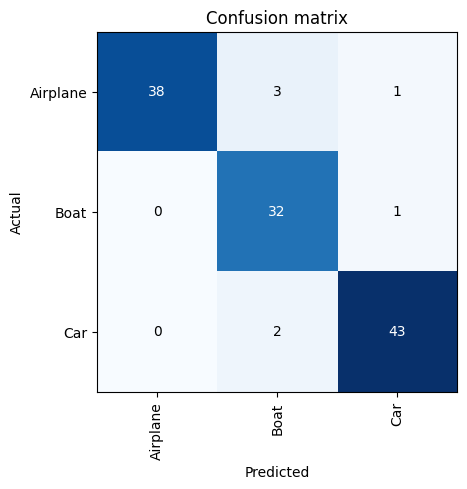

In [9]:
#tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Modelni tekshiramiz

In [10]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat: Car
Ehtimolik: 100.0%


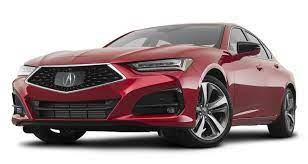

In [14]:
img = PILImage.create(upload.data[-1])
pred , pred_id, probs = learn.predict(img)
print(f"Bashorat: {pred}")
print(f"Ehtimolik: {probs[pred_id]*100:.1f}%")
img